<a href="https://colab.research.google.com/github/Alekhyo/Sales-Analysis/blob/master/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

# Reading all the data

In [0]:
files=[file for file in os.listdir('D:\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]



data=pd.DataFrame()

for file in files:
    df=pd.read_csv("D:\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+file)
    data=pd.concat([data,df])

data.to_csv("all_data.csv",index=False)

In [0]:
data=pd.read_csv("all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Droppping NaN values

In [0]:
data=data.dropna(how='any')

# Dropping Date with 'Or'

In [0]:
data=data[data['Order Date'].str[0:2]!='Or']

# Changing Date type from str to int and  adding 'Month' Column

In [0]:
data['Month']=data['Order Date'].str[0:2].astype('int64')

In [0]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


# Changing Data Types and adding 'Total Sales' column

In [0]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('int64')

In [0]:
data['Price Each']=data['Price Each'].astype('float')

In [0]:
data['Total Sales']=data['Quantity Ordered']*data['Price Each']

## Q1. What was  the best month for sales? How much was earned that month?

In [0]:
results=data.groupby('Month')['Total Sales'].sum()
results

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total Sales, dtype: float64

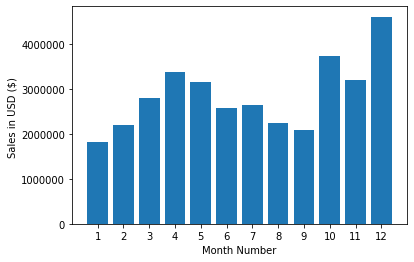

In [0]:
import matplotlib.pyplot as plt

months= range(1,13)

plt.bar(months,results)

plt.xticks(months)
plt.ylabel('Sales in USD ($) ')
plt.xlabel('Month Number')

plt.show()

## Q2. What City has the highest number of sales?

In [0]:
data['City']=data['Purchase Address'].apply(lambda x:x.split(",")[1]+","+x.split(",")[2].split(" ")[1])

In [0]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles,CA"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco,CA"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco,CA"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco,CA"


In [0]:
results=data.groupby('City')['Total Sales'].sum()
results

City
 Atlanta,GA          2.795499e+06
 Austin,TX           1.819582e+06
 Boston,MA           3.661642e+06
 Dallas,TX           2.767975e+06
 Los Angeles,CA      5.452571e+06
 New York City,NY    4.664317e+06
 Portland,ME         4.497583e+05
 Portland,OR         1.870732e+06
 San Francisco,CA    8.262204e+06
 Seattle,WA          2.747755e+06
Name: Total Sales, dtype: float64

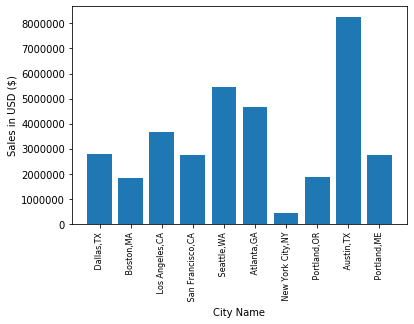

In [0]:
import matplotlib.pyplot as plt
cities=data['City'].unique()
plt.bar(cities,results)
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

## Q3. What time should we display advertisements to maximize likelihood of customer's buying products?

In [0]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [0]:
data['Hour']=data['Order Date'].dt.hour
data['Minute']=data['Order Date'].dt.minute

In [0]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles,CA",20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco,CA",16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco,CA",7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco,CA",17,30


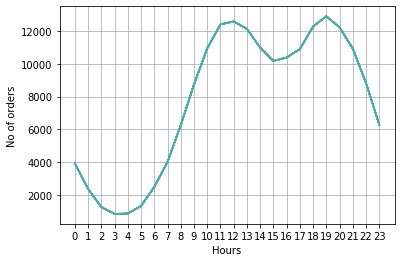

In [0]:
hours=[hour for hour, df in data.groupby('Hour')]
plt.plot(hours,data.groupby('Hour').count())
plt.grid()
plt.xticks(hours,size=10)
plt.xlabel("Hours")
plt.ylabel("No of orders")
plt.show()

#Advertisement should be displayed around 11/12 am or 7 pm

## Q4. What products are most often sold together? 

In [0]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles,CA",20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco,CA",16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco,CA",7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco,CA",17,30


In [0]:
df=data[data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df

C:\Users\ALEKHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [0]:
from itertools import combinations
from collections import Counter
count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

#for x,y in count:
#    print(x,",",y,end='\n')

for x,y in count.most_common(10):
    print(x,"  ,  ",y)

#Offer on iPhone and Lightning Charging Cable can get more buyers

('iPhone', 'Lightning Charging Cable')   ,   1005
('Google Phone', 'USB-C Charging Cable')   ,   987
('iPhone', 'Wired Headphones')   ,   447
('Google Phone', 'Wired Headphones')   ,   414
('Vareebadd Phone', 'USB-C Charging Cable')   ,   361
('iPhone', 'Apple Airpods Headphones')   ,   360
('Google Phone', 'Bose SoundSport Headphones')   ,   220
('USB-C Charging Cable', 'Wired Headphones')   ,   160
('Vareebadd Phone', 'Wired Headphones')   ,   143
('Lightning Charging Cable', 'Wired Headphones')   ,   92


## Q5. What product sold the most and why?

In [0]:
data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

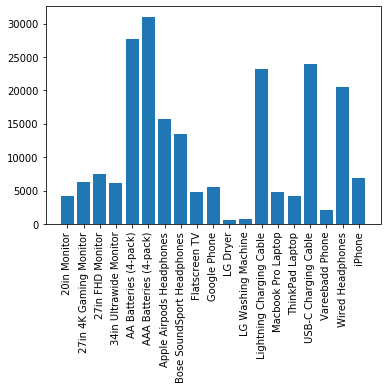

In [0]:
products=[product for product,data in data.groupby('Product')]
plt.bar(products,data.groupby('Product')['Quantity Ordered'].sum())

plt.xticks(rotation='vertical',size=10)

plt.show()

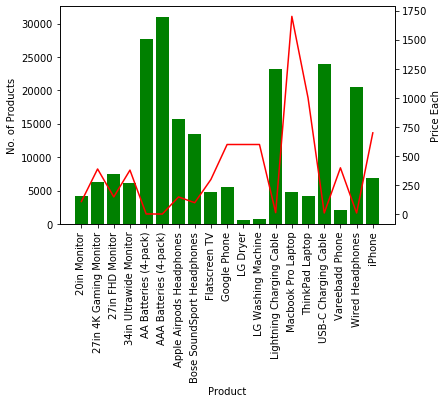

In [0]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,data.groupby('Product')['Quantity Ordered'].sum(),color='g')
ax2.plot(products,data.groupby('Product').mean()['Price Each'],color='r')

ax1.set_xlabel('Product')
ax1.set_ylabel('No. of Products')
ax2.set_ylabel('Price Each')
ax1.set_xticklabels(products,rotation='vertical',size=10)

plt.show()


##The product sold more has the lowest price